In [1]:
from transformers import (
    Blip2VisionConfig , 
    Blip2QFormerConfig,
    Blip2Config,
    OPTConfig,
    Blip2ForConditionalGeneration,
)
import matplotlib.pyplot as plt

In [2]:
configuration = Blip2Config()
model = Blip2ForConditionalGeneration(configuration)
configuration = model.config

print(configuration)

Blip2Config {
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "model_type": "blip-2",
  "num_query_tokens": 32,
  "qformer_config": {
    "model_type": "blip_2_qformer"
  },
  "text_config": {
    "model_type": "opt"
  },
  "transformers_version": "4.44.2",
  "use_decoder_only_language_model": true,
  "vision_config": {
    "model_type": "blip_2_vision_model"
  }
}



In [3]:
from transformers import Blip2VisionConfig , Blip2VisionModel

configuration_vision = Blip2VisionConfig()
model = Blip2VisionModel(configuration_vision)

configuration_2 = model.config
configuration_2

Blip2VisionConfig {
  "attention_dropout": 0.0,
  "hidden_act": "gelu",
  "hidden_size": 1408,
  "image_size": 224,
  "initializer_range": 1e-10,
  "intermediate_size": 6144,
  "layer_norm_eps": 1e-06,
  "model_type": "blip_2_vision_model",
  "num_attention_heads": 16,
  "num_hidden_layers": 39,
  "patch_size": 14,
  "qkv_bias": true,
  "transformers_version": "4.44.2"
}

In [4]:
model

Blip2VisionModel(
  (embeddings): Blip2VisionEmbeddings(
    (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
  )
  (encoder): Blip2Encoder(
    (layers): ModuleList(
      (0-38): 39 x Blip2EncoderLayer(
        (self_attn): Blip2Attention(
          (dropout): Dropout(p=0.0, inplace=False)
          (qkv): Linear(in_features=1408, out_features=4224, bias=True)
          (projection): Linear(in_features=1408, out_features=1408, bias=True)
        )
        (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        (mlp): Blip2MLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1408, out_features=6144, bias=True)
          (fc2): Linear(in_features=6144, out_features=1408, bias=True)
        )
        (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
)

In [5]:
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load processor and model with float16 precision
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
).to(device)


# Load and process the image



2024-09-03 10:54:30.757956: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-03 10:54:30.763514: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 10:54:30.813980: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-03 10:54:30.875139: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 10:54:30.918912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x798693327020>>
Traceback (most recent call last):
  File "/home/siddharth/Desktop/SIH/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [ ]:
image = Image.open("/home/siddharth/Desktop/SIH/model.png")
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

# Generate text


In [ ]:
generated_ids = model.generate(**inputs)


In [ ]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

a diagram of the organizational structure of a company


the image is a tree diagram


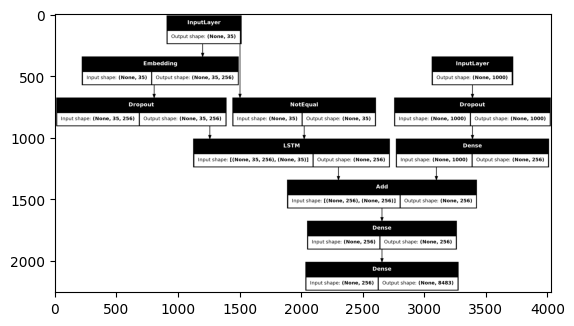

In [ ]:

prompt = "Question: what is the image? Answer:"

inputs = processor(images=image, text = prompt,return_tensors="pt").to(device, torch.float16)

# Generate text
generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

plt.imshow(image)
print(generated_text)



In [ ]:
prompt = "what colour is the background ?"
inputs = processor(text = prompt,return_tensors="pt").to(device, torch.float16)

# Generate text
generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

plt.imshow(image)
print(generated_text)

TypeError: BatchEncoding.to() takes 2 positional arguments but 3 were given